In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
df = pd.read_csv("car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [13]:
df_encoded = df.copy()

df_encoded = pd.get_dummies(
    df_encoded,
    columns=['Fuel_Type', 'Selling_type', 'Transmission'],
    drop_first=True
)

df_encoded.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True


In [14]:
X = df_encoded.drop("Selling_Price", axis=1)
y = df_encoded["Selling_Price"]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
# Drop car name column (string data not usable in ML)
X_train = X_train.drop("Car_Name", axis=1)
X_test = X_test.drop("Car_Name", axis=1)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred = model.predict(X_test)


In [19]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 1.2163740193336217
Mean Squared Error (MSE): 3.4813498305146187
R2 Score: 0.8488707839191938


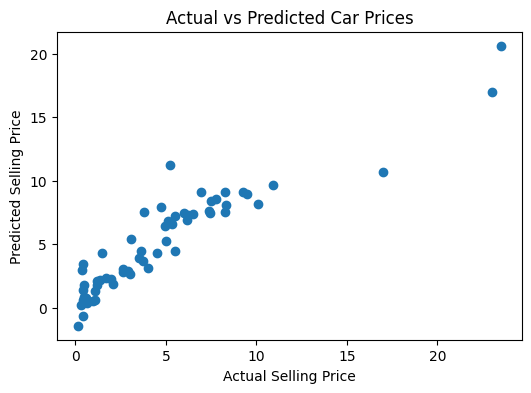

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [21]:
sample = X_test.iloc[0:1]
predicted_price = model.predict(sample)
print("Predicted Car Price:", predicted_price[0])


Predicted Car Price: 2.9543373071218184


In [22]:
## 📌 Key Insights
##- Car price depends strongly on present price, year, and kilometers driven.
##- Linear Regression provides a reasonable prediction accuracy.
##- Removing non-numeric features is essential for ML models.
